In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

submissions = pd.read_csv('./submissions.csv')
theia_sessions = pd.read_csv('./theia_sessions.csv')

In [3]:
submissions['created'] = submissions['created'].apply(pd.to_datetime)
theia_sessions['created'] = theia_sessions['created'].apply(pd.to_datetime)

In [7]:
submissions.head(5)

,Unnamed: 0,id,owner_id,assignment_id,processed,created
0,0,1,166.0,1,1,2020-09-10 14:00:00
1,1,2,264.0,1,1,2020-09-15 15:00:00
2,2,3,166.0,1,1,2020-09-15 16:00:00
3,3,4,197.0,1,1,2020-09-15 16:00:00
4,4,5,197.0,1,1,2020-09-15 16:00:00


<AxesSubplot:title={'center':'Average submissions per minute'}, xlabel='timestamp', ylabel='submission per minute'>

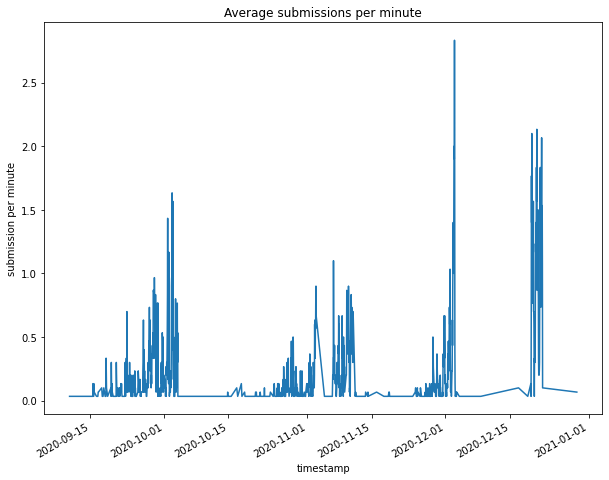

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

counted_submissions = submissions.groupby(['created'])['id'].count().reset_index().rename(columns={'id':'count'})
counted_submissions['count'] *= (2/60)
counted_submissions.plot(x='created', xlabel='timestamp', y='count', ylabel='submission per minute', 
                         legend=False, title='Average submissions per minute', ax=ax)